(lecture09:the-categorical-distribution)=
# The Categorical distribution

We are now going to generalize the six-sided die experiment.
A Categorical random variable is used to model an experiment with taking $K$ different possibilities coded, for example, $1, 2,\dots,K$, each with a different probability.
We can write:

$$
X = \begin{cases}
1,&\;\text{with probability}\;p_1,\\
2,&\;\text{with probability}\;p_2,\\
\vdots&\\
K,&\;\text{with probability}\;p_K.
\end{cases}
$$

Of course, we can also write:

$$
p(X=x) = p_x.
$$

Another way, we can write this is:

$$
X\sim \text{Categorical}(p_1,\dots,p_K),
$$

which we read as:

> the random variable $X$ follows a Categorical distribution with $K$ possibilities
> each with probability $p_1, p_2$ to $p_K$.

The six-sided, fair, die is a particular example of a Categorical.
This one in particular:

$$
p(X=x) = \frac{1}{6},
$$

if $x=1,2,\dots,6$.

## A specific example
Let's now make a specific choice for the probabilities, make a Categorical, and sample from it.
We are going to play with this one which has four possibilities:

$$
X \sim \text{Categorical}(0.1, 0.3, 0.4, 0.2).
$$

In [11]:
MAKE_BOOK_FIGURES=False

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks")

def set_book_style():
    plt.style.use('seaborn-v0_8-white') 
    sns.set_style("ticks")
    sns.set_palette("deep")

    mpl.rcParams.update({
        # Font settings
        'font.family': 'serif',  # For academic publishing
        'font.size': 8,  # As requested, 10pt font
        'axes.labelsize': 8,
        'axes.titlesize': 8,
        'xtick.labelsize': 7,  # Slightly smaller for better readability
        'ytick.labelsize': 7,
        'legend.fontsize': 7,
        
        # Line and marker settings for consistency
        'axes.linewidth': 0.5,
        'grid.linewidth': 0.5,
        'lines.linewidth': 1.0,
        'lines.markersize': 4,
        
        # Layout to prevent clipped labels
        'figure.constrained_layout.use': True,
        
        # Default DPI (will override when saving)
        'figure.dpi': 600,
        'savefig.dpi': 600,
        
        # Despine - remove top and right spines
        'axes.spines.top': False,
        'axes.spines.right': False,
        
        # Remove legend frame
        'legend.frameon': False,
        
        # Additional trim settings
        'figure.autolayout': True,  # Alternative to constrained_layout
        'savefig.bbox': 'tight',    # Trim when saving
        'savefig.pad_inches': 0.1   # Small padding to ensure nothing gets cut off
    })

def save_for_book(fig, filename, is_vector=True, **kwargs):
    """
    Save a figure with book-optimized settings.
    
    Parameters:
    -----------
    fig : matplotlib figure
        The figure to save
    filename : str
        Filename without extension
    is_vector : bool
        If True, saves as vector at 1000 dpi. If False, saves as raster at 600 dpi.
    **kwargs : dict
        Additional kwargs to pass to savefig
    """    
    # Set appropriate DPI and format based on figure type
    if is_vector:
        dpi = 1000
        ext = '.pdf'
    else:
        dpi = 600
        ext = '.tif'
    
    # Save the figure with book settings
    fig.savefig(f"{filename}{ext}", dpi=dpi, **kwargs)


def make_full_width_fig():
    return plt.subplots(figsize=(4.7, 2.9), constrained_layout=True)

def make_half_width_fig():
    return plt.subplots(figsize=(2.35, 1.45), constrained_layout=True)

if MAKE_BOOK_FIGURES:
    set_book_style()
make_full_width_fig = make_full_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()
make_half_width_fig = make_half_width_fig if MAKE_BOOK_FIGURES else lambda: plt.subplots()

import numpy as np
import scipy.stats as st

In [12]:
# The probabilities:
ps = [0.1, 0.3, 0.4, 0.2] # this has to sum to 1
# And here are the corresponding values:
xs = np.array([1, 2, 3, 4])
# Here is how you can define a categorical rv:
X = st.rv_discrete(name='Custom Categorical', values=(xs, ps))

You can evaluate the PMF anywhere you want: 

In [13]:
X.pmf(2)

0.3

In [14]:
X.pmf(3)

0.4

And you can sample from it like this:

In [15]:
X.rvs(size=10)

array([4, 3, 2, 3, 4, 3, 2, 3, 1, 4])

Let's plot the PMF:

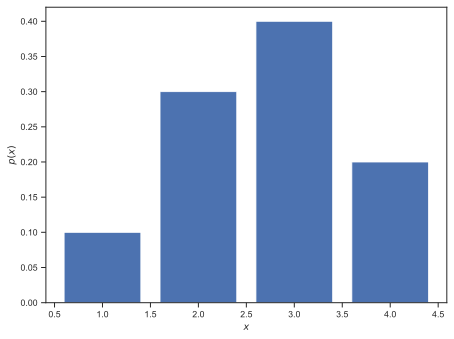

In [16]:
fig, ax = make_full_width_fig()
ax.bar(xs, X.pmf(xs))
ax.set_xlabel('$x$')
ax.set_ylabel('$p(x)$')
save_for_book(fig, 'ch9.fig2')

Okay.
Now let's find the probability that $X$ takes the value $2$ or $4$.
It is:

$$
p(X=2\;\text{or}X=4) = p(X=2) + p(X=4).
$$

So:

In [17]:
X.pmf(2) + X.pmf(4)

0.5

### Questions

+ Rerun all code segements above for the Categorical $X\sim \operatorname{Categorical}(0.1, 0.1, 0.4, 0.2, 0.2)$ taking values $1, 2, 3, 4$ and $5$.